In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/Car details v3.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [3]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
df = df.dropna(axis=0)

In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
Correct_Mileage= []
for i in df.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))
df['mileage'] = Correct_Mileage

/home/younes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
df['Brand'] = df['name'].str.split(' ').str[0]
df['engine'] = df['engine'].str.split(' ').str[0]
df['max_power'] = df['max_power'].str.split(' ').str[0]
df.drop(['name','torque'], inplace=True , axis=1)

/home/younes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/younes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/younes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   object 
 9   max_power      7906 non-null   object 
 10  seats          7906 non-null   float64
 11  Brand          7906 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 803.0+ KB


In [9]:
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   float64
 11  Brand          7906 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


/home/younes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/younes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df = pd.get_dummies(df, columns = ['fuel', 'seller_type' , 'transmission' , 'owner' , 'Brand'])
df


,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,450000,145500,23.0,1248.0,74.00,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,21.1,1498.0,103.52,5.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,17.0,1497.0,78.00,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,23.0,1396.0,90.00,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,16.0,1298.0,88.20,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.0,1197.0,82.85,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,2007,135000,119000,16.0,1493.0,110.00,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8125,2009,382000,120000,19.0,1248.0,73.90,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8126,2013,290000,25000,23.5,1396.0,70.00,5.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   mileage                       7906 non-null   float64
 4   engine                        7906 non-null   float64
 5   max_power                     7906 non-null   float64
 6   seats                         7906 non-null   float64
 7   fuel_CNG                      7906 non-null   uint8  
 8   fuel_Diesel                   7906 non-null   uint8  
 9   fuel_LPG                      7906 non-null   uint8  
 10  fuel_Petrol                   7906 non-null   uint8  
 11  seller_type_Dealer            7906 non-null   uint8  
 12  seller_type_Individual        7906 non-null   uint8  
 13  sel

In [12]:
X = df.loc[:, df.columns != 'selling_price']
y = df['selling_price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
Linear = LinearRegression()


In [15]:
Linear.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred_Linear = Linear.predict(X_test)


In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
print('Linear' ,mean_absolute_error(y_test, y_pred_Linear) )


Linear 160426.45785462344


In [19]:
print('Linear' ,r2_score(y_test, y_pred_Linear) )


Linear 0.8751424582378866


In [20]:
import xgboost as xgb

In [23]:
data_matrix = xgb.DMatrix(data=X, label=y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000)

In [27]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [28]:
y_pred = xg_reg.predict(X_test)

In [30]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

63607.15432947648

In [31]:
metrics.r2_score(y_test, y_pred)

0.9750752353560481

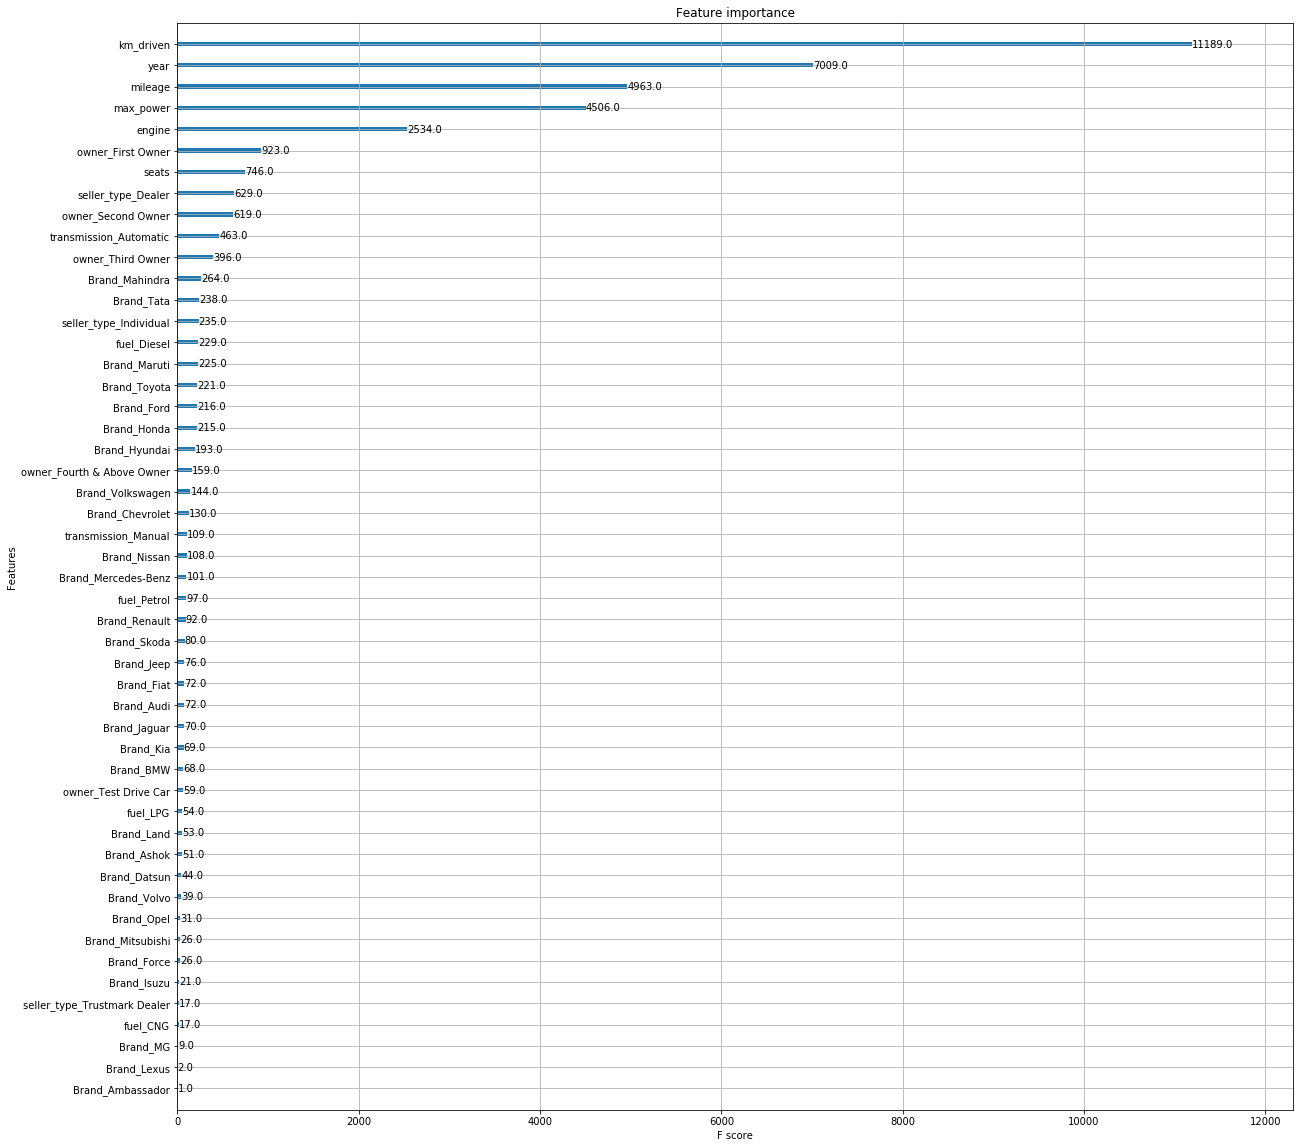

In [37]:
ax = xgb.plot_importance(xg_reg )
fig = ax.figure
fig.set_size_inches(20, 20)